# Iris Classification Models
### Author: Bryce Freshcorn (bcf4kv@virginia.edu)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('bezdekIris.data', header=None, names=['sepal_length', 'sepal_width',\
                                                          'petal_length', 'petal_width',\
                                                          'class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


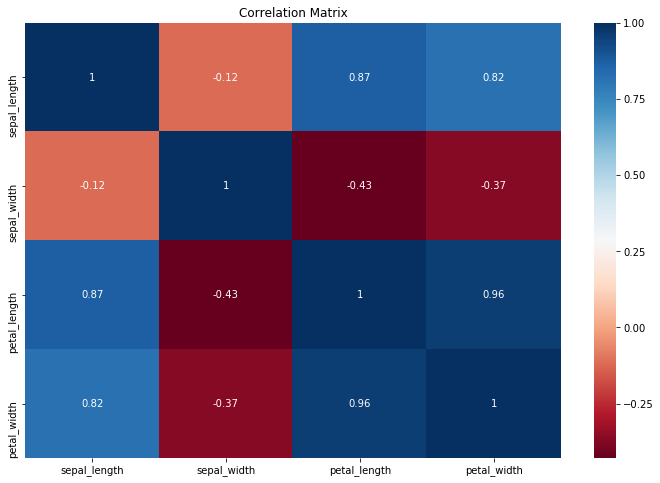

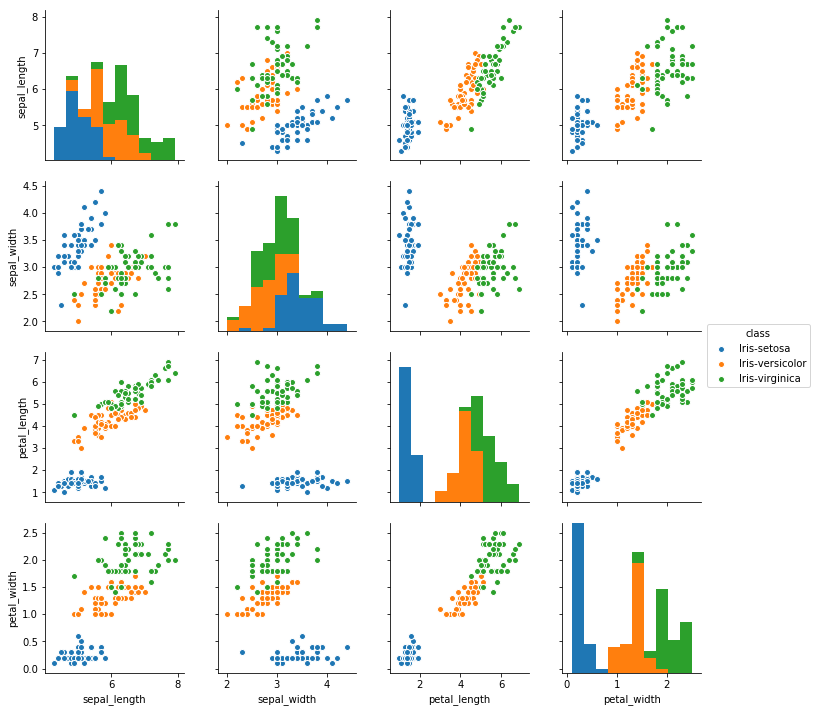

In [5]:
plt.figure(figsize=(12,8))
ax1 = sns.heatmap(data.corr(), annot=True, cmap='RdBu')
ax1.set_title('Correlation Matrix')
sns.pairplot(data, hue='class')

In [6]:
target = data['class']
features = data.drop('class', axis=1)
dummy_model_predictions = DummyClassifier(random_state=123).fit(features, target).predict(features)
print('-----Dummy Model Confusion Matrix-----\n{}\n\n'.format(confusion_matrix(target, dummy_model_predictions)))
print('-----Dummy Model Classification Report-----\n{}'.format(classification_report(target, dummy_model_predictions)))

-----Dummy Model Confusion Matrix-----
[[12 20 18]
 [15 20 15]
 [18 11 21]]


-----Dummy Model Classification Report-----
                 precision    recall  f1-score   support

    Iris-setosa       0.27      0.24      0.25        50
Iris-versicolor       0.39      0.40      0.40        50
 Iris-virginica       0.39      0.42      0.40        50

    avg / total       0.35      0.35      0.35       150



In [15]:
set_sizes = [0.2, 0.4, 0.6, 0.8, 1]
svc_lc = learning_curve(SVC(kernel='poly', random_state=123), X=features, y=target, train_sizes=set_sizes,\
                        scoring='f1_weighted', shuffle=True, verbose=1)
bagged_trees_lc = learning_curve(BaggingClassifier(random_state=123), X=features, y=target,\
                                 train_sizes=set_sizes, scoring='f1_weighted', shuffle=True, verbose=1)
knn_lc = learning_curve(KNeighborsClassifier(), X=features, y=target, train_sizes=set_sizes,\
                        scoring='f1_weighted', shuffle=True, verbose=1)
gradient_lc = learning_curve(GradientBoostingClassifier(random_state=123), X=features, y=target,\
                             train_sizes=set_sizes, scoring='f1_weighted', shuffle=True, verbose=1)
random_forest_lc = learning_curve(RandomForestClassifier(random_state=123), X=features, y=target,\
                                  train_sizes=set_sizes, scoring='f1_weighted', shuffle=True, verbose=1)

[learning_curve] Training set sizes: [19 39 59 79 99]
[learning_curve] Training set sizes: [19 39 59 79 99]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


[learning_curve] Training set sizes: [19 39 59 79 99]
[learning_curve] Training set sizes: [19 39 59 79 99]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.5s finished


[learning_curve] Training set sizes: [19 39 59 79 99]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


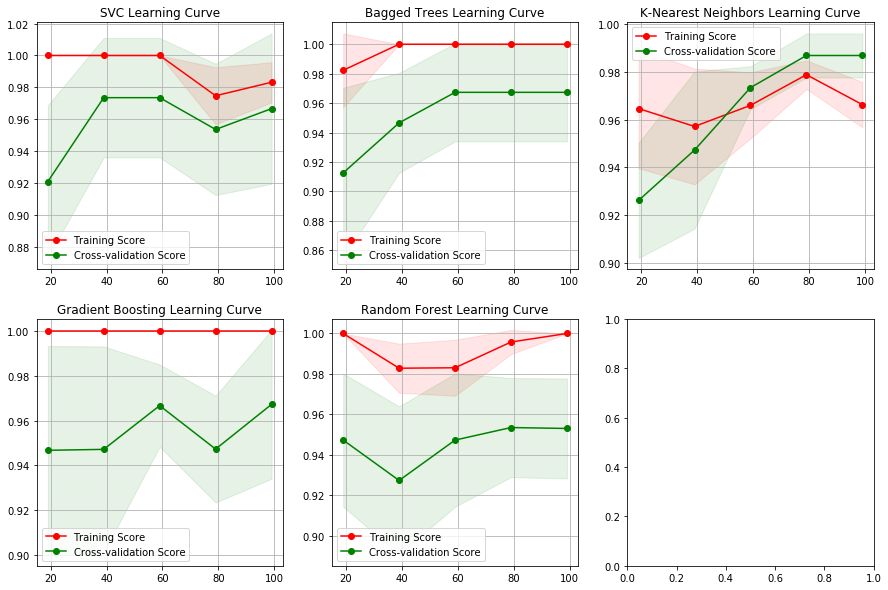

In [16]:
model_names = ['SVC', 'Bagged Trees', 'K-Nearest Neighbors','Gradient Boosting', 'Random Forest']
titles = ['{} Learning Curve'.format(name) for name in model_names]

def plot_learning_curve(ax, title, model_lc):
    train_sizes = model_lc[0]
    
    mean_train_scores = np.mean(model_lc[1], axis=1)
    std_train_scores = np.std(model_lc[1], axis=1)
    top_train_scores = mean_train_scores + std_train_scores
    bottom_train_scores = mean_train_scores - std_train_scores
    
    mean_test_scores = np.mean(model_lc[2], axis=1)
    std_test_scores = np.std(model_lc[2], axis=1)
    top_test_scores = mean_test_scores + std_test_scores
    bottom_test_scores = mean_test_scores - std_test_scores
    
    ax.grid()
    ax.set_title(title)
    ax.set_ylabel = 'F1-Weighted Score'
    ax.set_xlabel = 'Training Examples'
    ax.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training Score')
    ax.plot(train_sizes, mean_test_scores, 'o-', color='g', label='Cross-validation Score')
    ax.fill_between(train_sizes, bottom_train_scores, top_train_scores, alpha=0.1, color='r')
    ax.fill_between(train_sizes, bottom_test_scores, top_test_scores, alpha=0.1, color='g')
    ax.legend(loc='best')
    return ax

figure, axes = plt.subplots(2, 3, figsize=(15, 10))
plot_learning_curve(axes[0,0], titles[0], svc_lc)
plot_learning_curve(axes[0,1], titles[1], bagged_trees_lc)
plot_learning_curve(axes[0,2], titles[2], knn_lc)
plot_learning_curve(axes[1,0], titles[3], gradient_lc)
plot_learning_curve(axes[1,1], titles[4], random_forest_lc)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=123)

/Users/userBryce/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
param_grid = {'n_neighbors': [4, 5, 7, 9], 'weights': ('uniform', 'distance')}
knn_model = KNeighborsClassifier()
clf = GridSearchCV(knn_model, param_grid, scoring='f1_weighted', cv=10, verbose=1)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [4, 5, 7, 9], 'weights': ('uniform', 'distance')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_weighted', verbose=1)

In [40]:
print('----Best Model Hyperparameters----\n{}'.format(clf.best_estimator_))
print('SCORE: {}'.format(clf.best_score_))

----Best Model Hyperparameters----
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')
SCORE: 0.9833333333333333


In [41]:
test_predictions = clf.predict(X_test)
f1_score(y_test, test_predictions, average='weighted')

0.93333333333333335

In [49]:
data[:, 0].min()

TypeError: unhashable type: 'slice'